In [1]:
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
import math

In [2]:
hdulist = fits.open('../petroC_nsa_gzoo.fits')
tbdata = hdulist[1].data
color = tbdata['col10'] #^{0.1}(g-r), K-E corrected to z=0.1, petro
M_r = tbdata['col9'] #^{0.1}(M_r) - 5\log h, K-E corrected to z=0.1, petro
pfeatures = tbdata['t01_smooth_or_features_a02_features_or_disk_weighted_fraction']
psmooth = tbdata['t01_smooth_or_features_a01_smooth_weighted_fraction']
sSFR = tbdata['B300']
HA = tbdata['HAFLUX']
HB = tbdata['HBFLUX']
mags = tbdata['ABSMAG']
NUV = mags[:,1]
z = tbdata['Z']
hdulist.close()

In [15]:
early_pfeatures = []
early_psmooth = []
early_color = []
early_sfr = []
early_mr = []

late_pfeatures = []
late_psmooth = []
late_color = []
late_sfr = []
late_mr = []

int_pfeatures = []
int_psmooth = []
int_color = []
int_sfr = []
int_mr = []

for i in np.arange(pfeatures.size):
    if z[i] > 0.01 and z[i] < 0.06:
        color_line = 0.7 - 0.032*(M_r[i] + 16.5)
        #cline_arr.append(color_line)
        active_line = -10 + 0.094*(M_r[i] + 15)
        #aline_arr.append(active_line)
        
        #mr_arr.append(M_r[i])
        
        logsSFR = math.log(sSFR[i], 10)
        if color[i] >= color_line: #red galaxies
            if logsSFR <= active_line: #passive galaxies - early type
                early_pfeatures.append(pfeatures[i])
                early_psmooth.append(psmooth[i])
                early_color.append(color[i])
                early_sfr.append(logsSFR)
                early_mr.append(M_r[i])
            else: #red and active - intermediate type
                int_pfeatures.append(pfeatures[i])
                int_psmooth.append(pfeatures[i])
                int_color.append(color[i])
                int_sfr.append(logsSFR)
                int_mr.append(M_r[i])
        elif logsSFR >= active_line: #blue and active - late type
            late_pfeatures.append(pfeatures[i])
            late_psmooth.append(psmooth[i])
            late_color.append(color[i])
            late_sfr.append(logsSFR)
            late_mr.append(M_r[i])

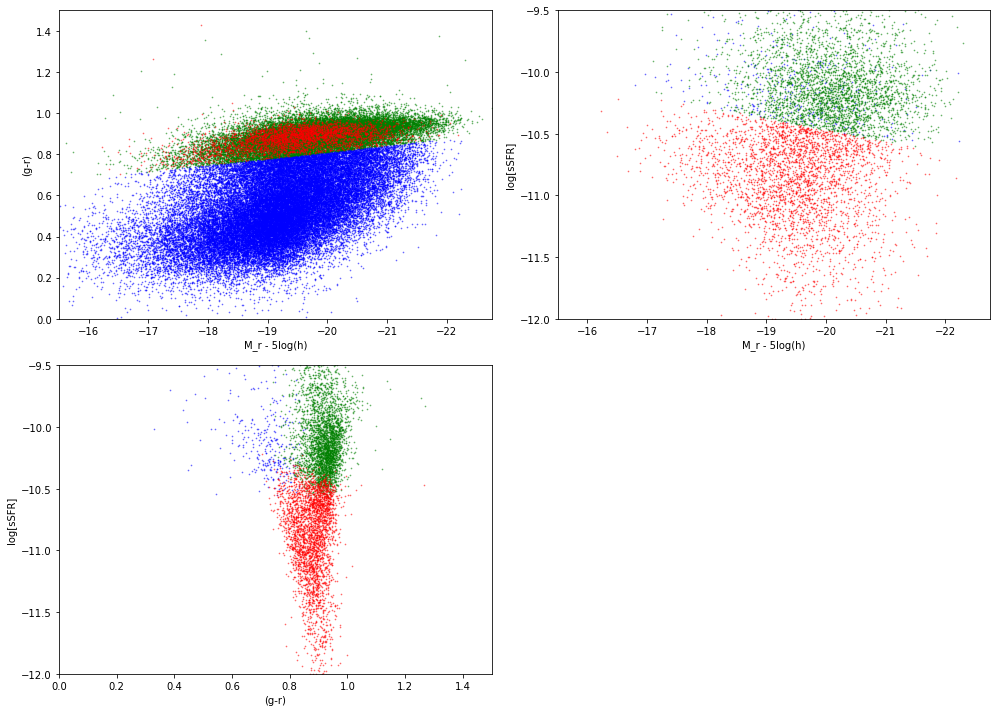

In [16]:
fig = plt.figure(figsize=(14,10))

colors = [late_color, int_color, early_color]
mrs = [late_mr, int_mr, early_mr]
sfrs = [late_sfr, int_sfr, early_sfr]
plot_color = ['b', 'g', 'r']

#top left plot
ax1 = fig.add_subplot(221)
for i in np.arange(3):
    ax1.scatter(mrs[i], colors[i], color = plot_color[i], s=0.5, alpha=0.5)
ax1.set_ylabel('(g-r)')
ax1.set_xlabel('M_r - 5log(h)')
ax1.set_ylim(0, 1.5)
ax1.set_xlim(-15.5, -22.75)

#top right plot
ax2 = fig.add_subplot(222)
for i in np.arange(3):
    ax2.scatter(mrs[i], sfrs[i], color = plot_color[i], s=0.5, alpha=0.5)
ax2.set_ylabel('log[sSFR]')
ax2.set_xlabel('M_r - 5log(h)')
ax2.set_ylim(-12, -9.5)
ax2.set_xlim(-15.5, -22.75)

#bottom left plot
ax3 = fig.add_subplot(223)
for i in np.arange(3):
    ax3.scatter(colors[i], sfrs[i], color = plot_color[i], s=0.5, alpha=0.5)
ax3.set_ylabel('log[sSFR]')
ax3.set_xlabel('(g-r)')
ax3.set_ylim(-12, -9.5)
ax3.set_xlim(0,1.5)

plt.tight_layout()
plt.show()

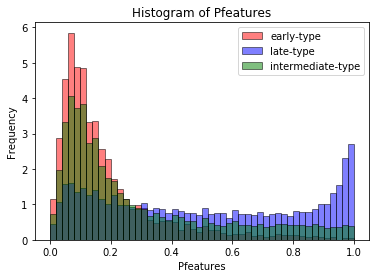

In [5]:
plt.hist(early_pfeatures, 50, normed=1, facecolor='r', alpha=0.5, ec='black', label='early-type')
plt.hist(late_pfeatures, 50, normed=1, facecolor='b', alpha=0.5, ec='black', label='late-type')
plt.hist(int_pfeatures, 50, normed=1, facecolor='g', alpha=0.5, ec='black', label='intermediate-type')
plt.xlabel('Pfeatures')
plt.ylabel('Frequency')
plt.title('Histogram of Pfeatures')
plt.legend(loc='upper right')
plt.show()

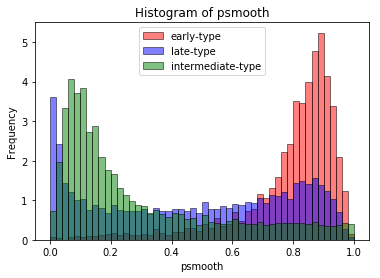

In [6]:
plt.hist(early_psmooth, 50, normed=1, facecolor='r', alpha=0.5, ec='black', label='early-type')
plt.hist(late_psmooth, 50, normed=1, facecolor='b', alpha=0.5, ec='black', label='late-type')
plt.hist(int_psmooth, 50, normed=1, facecolor='g', alpha=0.5, ec='black', label='intermediate-type')
plt.xlabel('psmooth')
plt.ylabel('Frequency')
plt.title('Histogram of psmooth')
plt.legend(loc='upper center')
plt.show()